<a href="https://colab.research.google.com/github/poonamaswani/DataScience_1/blob/main/CAM_DS_C201_Demo_1_2_2_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 1.2.2 Understanding the process of gradient descent

Follow the demonstration to learn about gradient descent algorithms. In this demonstration, you’ll learn how to:
- perform gradient descent as optimisation
- perform an iterative process of line fitting
- set up an automated gradient descent as an example of machine learning.



In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1_jEskKblJq4mfBpQBipdpApxDIwW51b4
!gdown https://drive.google.com/uc?id=1oQdy5mS9msRbUYn5Hxp-dWogjQKyOk-W

In [ ]:
# Import the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import time

from run_gradient_descent import cost,gradient, gradient_descent
from IPython.display import display, clear_output
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from create_data_helper import create_data_slr

In [ ]:
# Create a data set.
x_data, y_data, w_range, b_range, w_true, b_true = create_data_slr()

# Assign the variables.
x = x_data
X = np.reshape(x, (-1,1))
y = y_data

## a. Run gradient descent.

In [ ]:
# Import the necessary libraries.
from run_gradient_descent import cost,gradient, gradient_descent


# Prepare the data.
np.random.seed(1)
initial_w = np.array([8])
initial_b = 10

# Set the gradient descent settings.
iterations = 1200
alpha = 0.02

w_in,b_in, J_history, w_history, b_history = gradient_descent(X ,y,
                                                              initial_w, initial_b,
                                                              cost, gradient, alpha,
                                                              iterations)

Iteration    0: Cost   135.68   
Iteration    1: Cost   129.04   
Iteration    2: Cost   122.73   
Iteration    3: Cost   116.73   
Iteration    4: Cost   111.02   
Iteration    5: Cost   105.58   
Iteration    6: Cost   100.42   
Iteration    7: Cost    95.51   
Iteration    8: Cost    90.84   
Iteration    9: Cost    86.39   
Iteration   10: Cost    82.17   
Iteration   15: Cost    63.95   
Iteration   30: Cost    30.17   
Iteration   45: Cost    14.26   
Iteration   60: Cost     6.77   
Iteration   75: Cost     3.24   
Iteration   90: Cost     1.58   
Iteration  105: Cost     0.79   
Iteration  140: Cost     0.21   
Iteration  175: Cost     0.10   
Iteration  210: Cost     0.08   
Iteration  245: Cost     0.07   
Iteration  280: Cost     0.06   
Iteration  315: Cost     0.06   
Iteration  350: Cost     0.05   
Iteration  385: Cost     0.05   
Iteration  420: Cost     0.05   
Iteration  455: Cost     0.04   
Iteration  490: Cost     0.04   
Iteration  525: Cost     0.04   
Iteration 

> Output


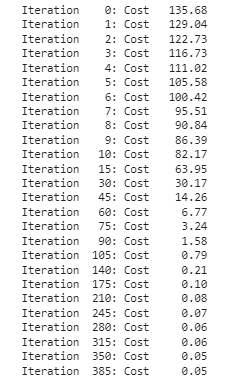

In [ ]:
# Compute the MSE for each value of w and b.
from sklearn.metrics import mean_squared_error, r2_score

mse_w = [(np.mean((y_data - (w * x_data + b_true))**2)) for w in w_range]
mse_b = [(np.mean((y_data - (w_true * x_data + b))**2)) for b in b_range]

## b. Create a visualisation.

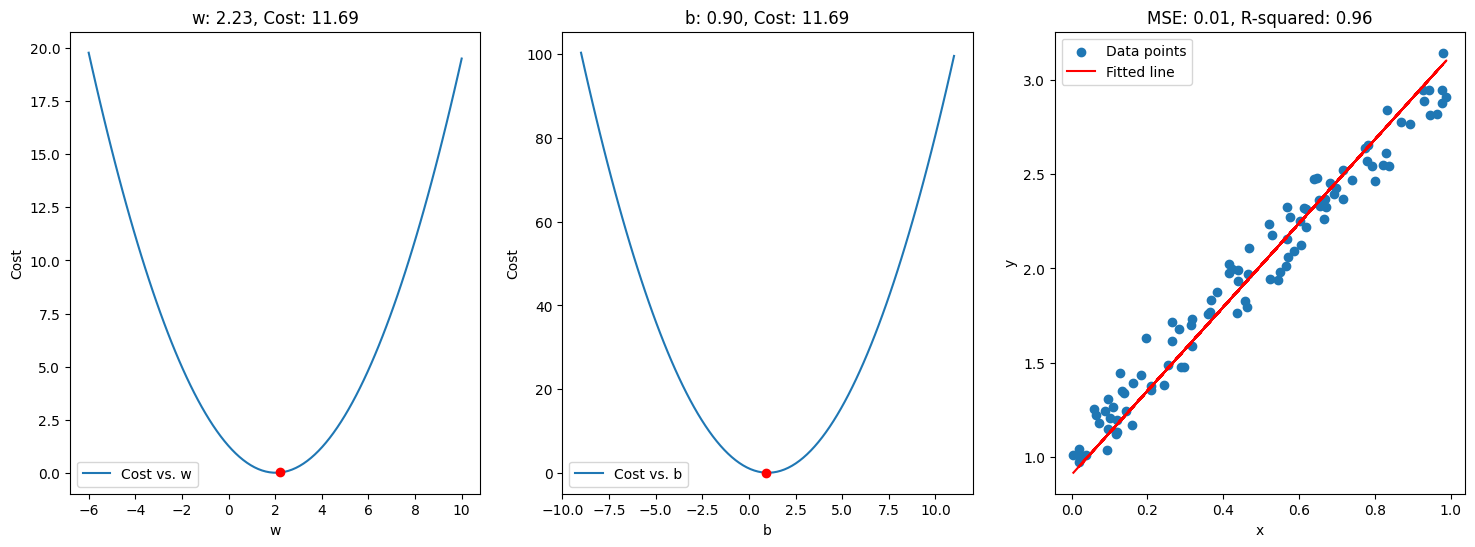

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a visualisation (2D).
J_history_w = [(np.mean((y_data - (w * x_data + b_true))**2)) for w in w_history]
J_history_b = [(np.mean((y_data - (w_true * x_data + b))**2)) for b in b_history]

# Loop to update the plot.
for i in range(len(w_history)):
    # Clear the previous plot.
    clear_output(wait=True)
    # Clear the current figure.
    plt.clf()

    # Current values for w and b.
    w = w_history[i]
    b = b_history[i]

    # Predict y values.
    y_pred = w * x_data + b

    # Compute MSE and R-squared.
    mse = mean_squared_error(y_data, y_pred)
    r_squared = r2_score(y_data, y_pred)

    # Create the figure and axes for each frame.
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Plot the parabolas and updating titles.
    ax1.plot(w_range, mse_w, label='Cost vs. w')
    ax1.plot(w, J_history_w[i], 'ro')
    ax1.set_title(f'w: {w:.2f}, Cost: {J_history[i]:.2f}')
    ax2.plot(b_range, mse_b, label='Cost vs. b')
    ax2.plot(b, J_history_b[i], 'ro')
    ax2.set_title(f'b: {b:.2f}, Cost: {J_history[i]:.2f}')

    # Plot the scatter plot, the line, and updating title.
    ax3.scatter(x_data, y_data, label='Data points')
    ax3.plot(x_data, y_pred, 'r-', label='Fitted line')
    ax3.set_title(f'MSE: {mse:.2f}, R-squared: {r_squared:.2f}')

    # Set labels and legends.
    ax1.set_xlabel('w')
    ax1.set_ylabel('Cost')
    ax2.set_xlabel('b')
    ax2.set_ylabel('Cost')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax1.legend()
    ax2.legend()
    ax3.legend()

    # Display the updated plot.
    display(fig)

    # Pause to create the animation effect.
    time.sleep(0.1)

    # Close the plot to prevent redundant plots from being displayed in the Notebook.
    plt.close(fig)

> Output

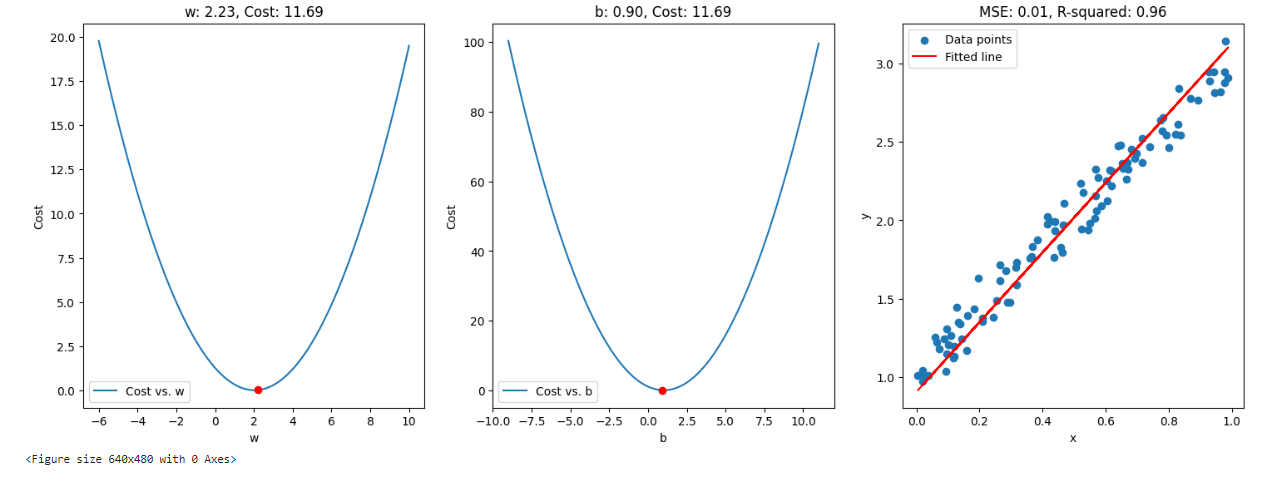

## c. Create a 3D visualisation.

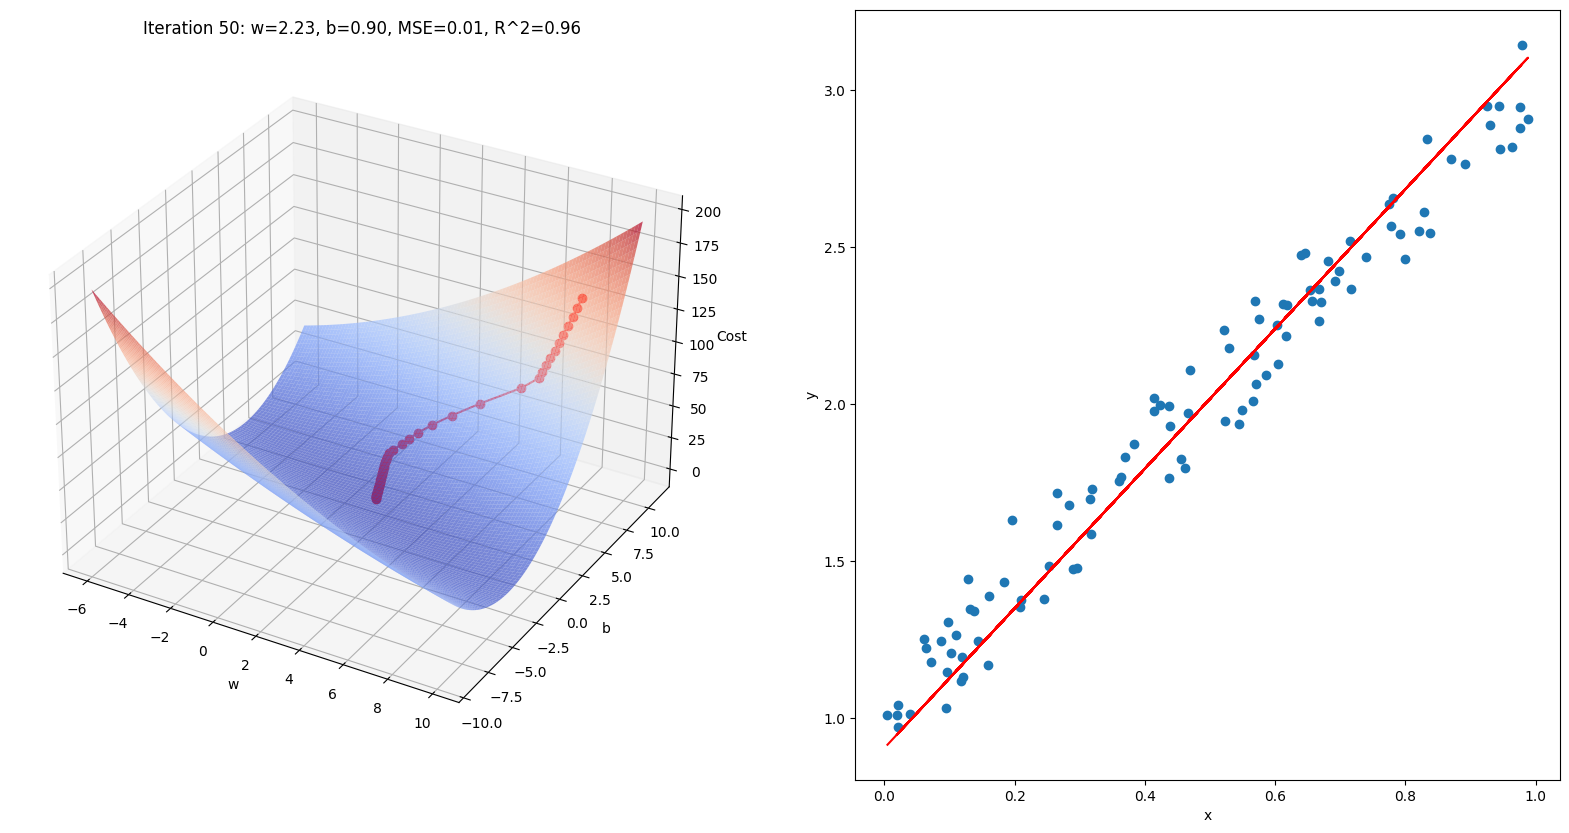

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a visualisation (3D).
# Create a meshgrid for w and b.
W, B = np.meshgrid(w_range, b_range)

# Calculate the cost for each combination of w and b.
Z = np.array([[np.mean((y_data - (w * x_data + b))**2) for w, b in zip(w_row, b_row)] for w_row, b_row in zip(W, B)])

# Loop to update the plot.
for i in range(len(w_history)):
    # Clear the previous plot.
    clear_output(wait=True)
    # Clear the current figure.
    plt.clf()

    # Current values for w and b.
    w = w_history[i]
    b = b_history[i]

    # Predict y values.
    y_pred = w * x_data + b

    # Compute MSE and R-squared.
    mse = mean_squared_error(y_data, y_pred)
    r_squared = r2_score(y_data, y_pred)
    #print(len(y_data), len(y_pred))

    # Create the figure with 1 row and 2 columns. ax1 is 3D subplot, ax2 is 2D subplot.
    fig = plt.figure(figsize=(20, 10))
    # 3D plot on the left
    ax = fig.add_subplot(121, projection='3d')
    # 2D plot on the right
    ax3 = fig.add_subplot(122)

    # Plot the surface.
    ax.plot_surface(W, B, Z, rstride=1, cstride=1,
                    color='b', alpha=0.7, cmap='coolwarm')

    # Plot the history as a line.
    ax.plot(w_history[:i+1], b_history[:i+1],
            J_history[:i+1], color='r', marker='o')
    # Annotate the current point.
    ax.scatter(w_history[i], b_history[i],
               J_history[i], color='r')
    #ax.text(w, b, J_history[i], f'({w:.2f}, {b:.2f}, {J_history[i]:.2f})', color='black')

    # Set labels.
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('Cost')
    ax.set_title(f'Iteration {i+1}: w={w:.2f}, b={b:.2f}, MSE={mse:.2f}, R^2={r_squared:.2f}')

    # Plot the scatter plot, the line, and update title.
    ax3.scatter(x_data, y_data, label='Data points')
    ax3.plot(x_data, y_pred, 'r-', label='Fitted line')
    #ax3.set_title(f'MSE: {mse:.2f}, R-squared: {r_squared:.2f}').
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')

    # Display the updated plot.
    display(fig)

    # Pause to create the animation effect.
    time.sleep(0.1)

    # Close the plot to prevent redundant plots from being displayed in the Notebook.
    plt.close(fig)

Output

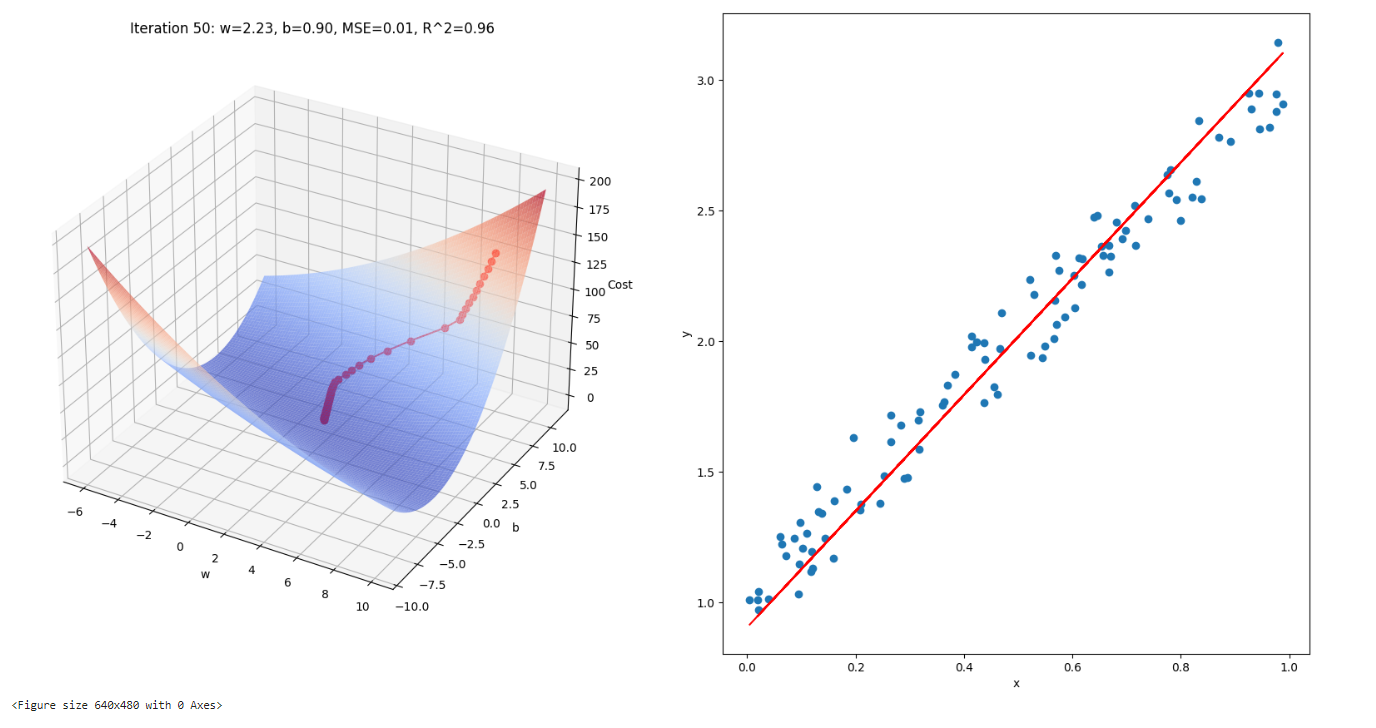

# Key information
This demonstration illustrated gradient descent with 2D and 3D visualisations.
## Reflect
What are the practical applications of the technique?

> Select the pen from the toolbar to add your entry.